In [1]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np

In [2]:
def data_load(filename):
    f = open(filename, 'r')
    lines = f.readlines()
    y_tmp = lines[0].split(',')
    y = [float(i) for i in y_tmp]
    x_tmp = lines[1].split(',')
    x = [float(i) for i in x_tmp]
    
    return [x, y]

In [3]:
def do_go(x_training, y_training, kernel):
    X = np.array(x_training).reshape(-1, 1)
    # Observations
    y = y_training
    
    #for prediction
    x = np.linspace(-237, -207, 100).reshape(-1,1)

    # Instantiate a Gaussian Process model
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X, y)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)
    print(np.min(y_pred))
    print(x[np.argmin(y_pred)])

    # Plot the function, the prediction and the 95% confidence interval based on
    # the MSE
    plt.figure(figsize=(10,5))
    plt.plot(X, y, 'r.', markersize=10, label='Observations')
    plt.plot(x, y_pred, 'b-', label='Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    #plt.fill(np.concatenate([x, x[::-1]]),
    #         np.concatenate([y_pred - 2.5760 * sigma,
    #                        (y_pred + 2.5760 * sigma)[::-1]]),
    #         alpha=.3, fc='g', ec='None', label='99% confidence interval')
    plt.xlabel('$x-position$')
    plt.ylabel('$min. distance$')
    plt.ylim(-10, 20)
    plt.legend(loc='upper left')
    plt.show
    return [x, y_pred, sigma]

2.2466170332854176
[-229.42424242]


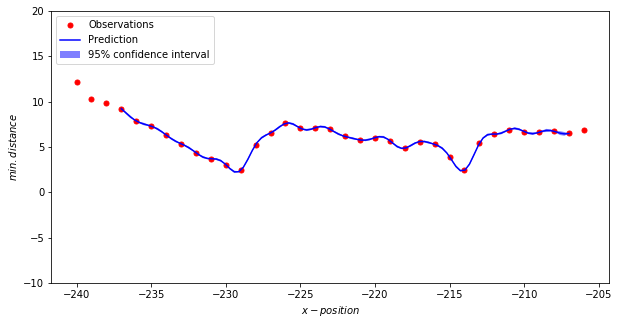

In [4]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data4.txt')
x1_p, y1_p, sigma1 = do_go(x1, y1, kernel)

2.3700237566401876
[-213.96969697]


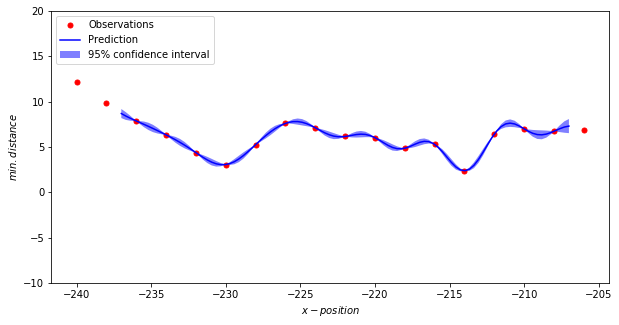

In [5]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_even.txt')
x2_p, y2_p, sigma2 = do_go(x1, y1, kernel)

2.1455901787832943
[-229.42424242]


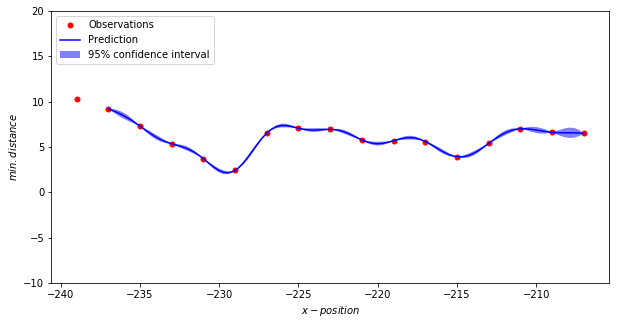

In [74]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_odd.txt')
x3_p, y3_p, sigma3 = do_go(x1, y1, kernel)

2.3067666837422927
[-229.72727273]


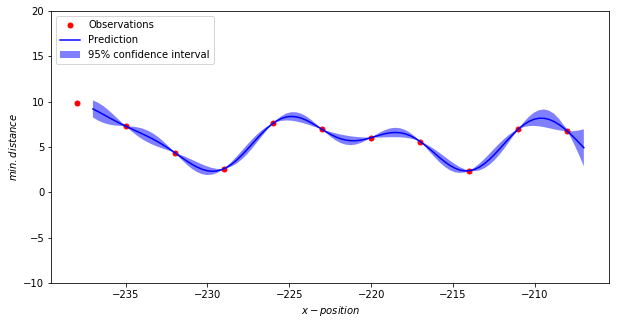

In [75]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_3-1.txt')
x4_p, y4_p, sigma4 = do_go(x1, y1, kernel)

3.6391004483015763
[-230.63636364]


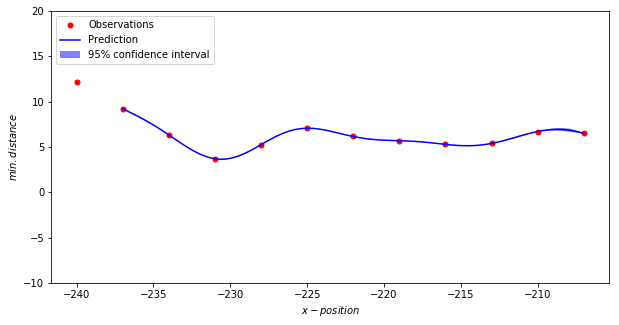

In [76]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_3-2.txt')
x5_p, y5_p, sigma5 = do_go(x1, y1, kernel)

3.013021633440701
[-230.33333333]


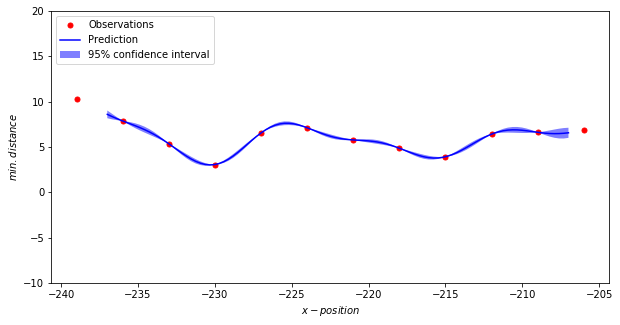

In [80]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_3-3.txt')
x6_p, y6_p, sigma6 = do_go(x1, y1, kernel)

4.170272063284031
[-230.93939394]


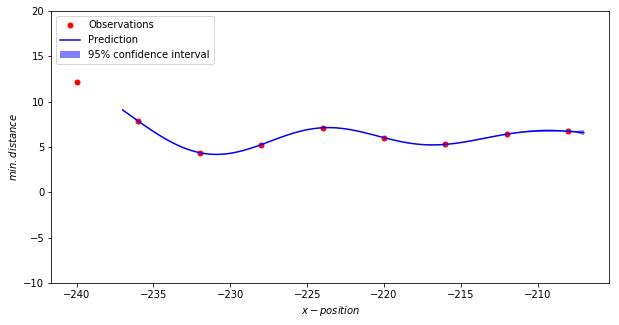

In [81]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_4-1.txt')
x7_p, y7_p, sigma7 = do_go(x1, y1, kernel)

3.665528635795701
[-231.24242424]


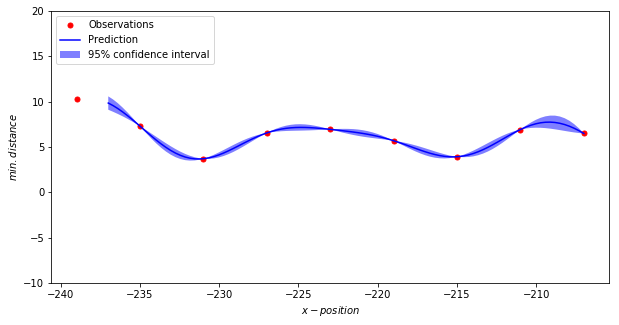

In [82]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_4-2.txt')
x8_p, y8_p, sigma8 = do_go(x1, y1, kernel)

2.3642531470308943
[-214.27272727]


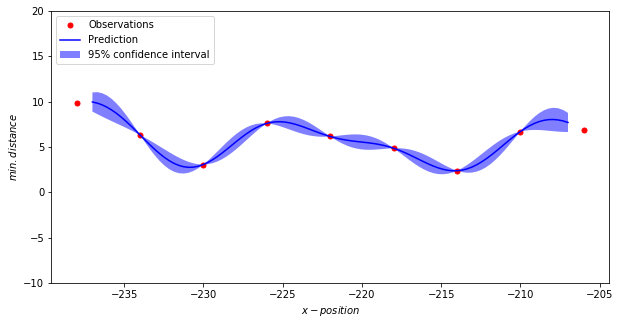

In [85]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_4-3.txt')
x9_p, y9_p, sigma9 = do_go(x1, y1, kernel)

2.0410291856411646
[-230.03030303]


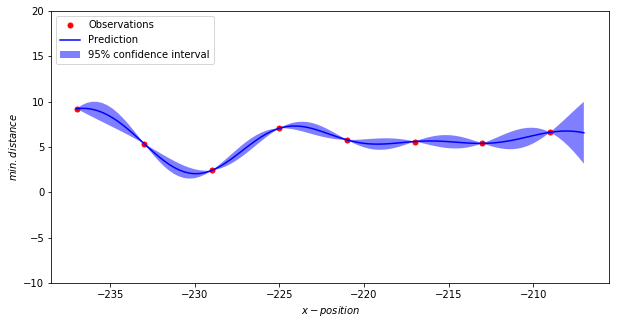

In [87]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_4-4.txt')
x10_p, y10_p, sigma10 = do_go(x1, y1, kernel)

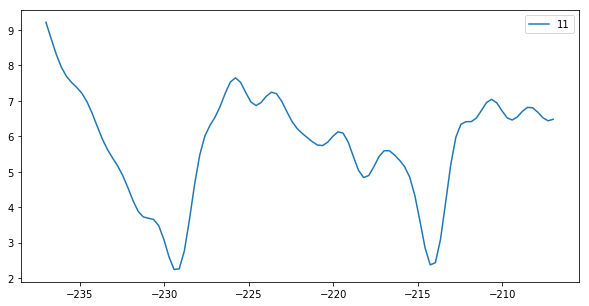

NameError: name 'x3_p' is not defined

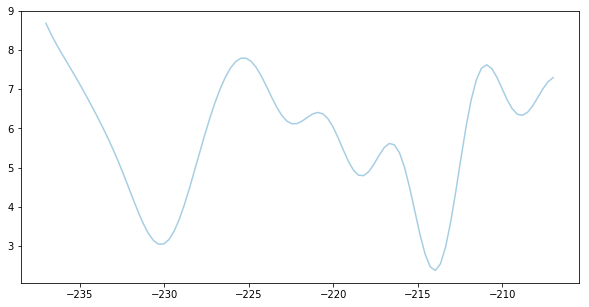

In [6]:
import matplotlib.cm as cm
colors = [ cm.Paired(x) for x in np.linspace(0.0,1.0,20) ]
plt.figure(figsize=(10,5))
plt.plot(x1_p, y1_p, c=colors[2], label='11')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(x2_p, y2_p, c=colors[0], label='21')
plt.plot(x3_p, y3_p, c=colors[10], label='22')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(x4_p, y4_p, c=colors[0], label='31')
plt.plot(x5_p, y5_p, c=colors[7], label='32')
plt.plot(x6_p, y6_p, c=colors[14], label='33')
plt.legend()
plt.show()
plt.figure(figsize=(10,5))
plt.plot(x7_p, y7_p, c=colors[0], label='41')
plt.plot(x8_p, y8_p, c=colors[5], label='42')
plt.plot(x9_p, y9_p, c=colors[10], label='43')
plt.plot(x10_p, y10_p, c=colors[15], label='44')
plt.legend()
plt.show()


2.9867929925296286
[-230.63636364]
2.293048342288884
[-214.57575758]
4.47593189236083
[-230.63636364]
4.338216921365828
[-231.54545455]
3.6697773760407335
[-231.24242424]


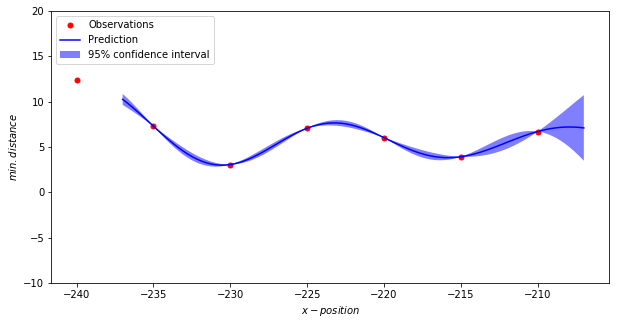

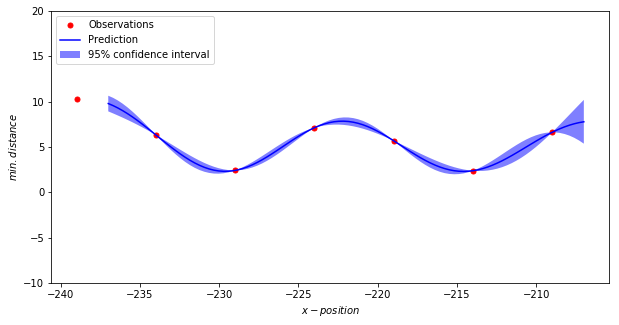

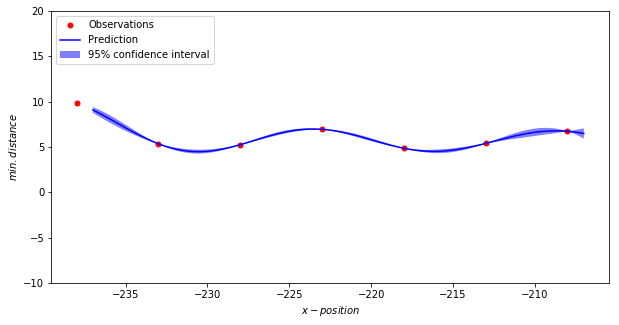

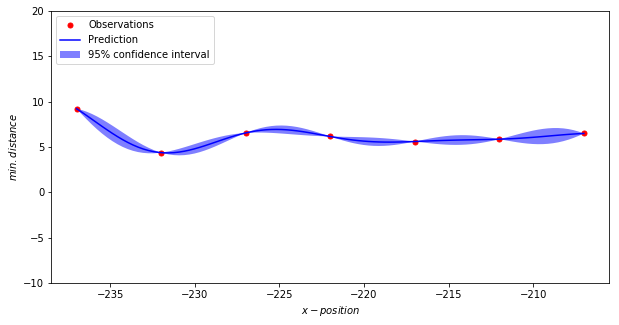

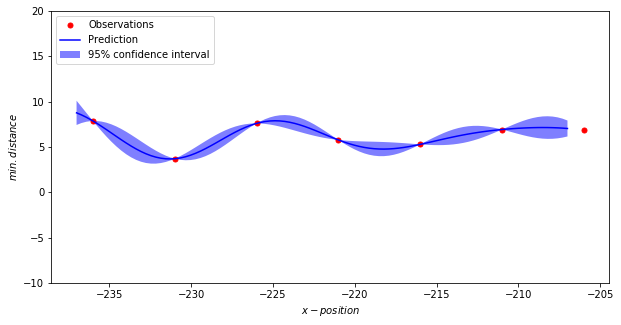

In [8]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_5-1.txt')
x11_p, y11_p, sigma11 = do_go(x1, y1, kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_5-2.txt')
x12_p, y12_p, sigma12 = do_go(x1, y1, kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_5-3.txt')
x13_p, y13_p, sigma13 = do_go(x1, y1, kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_5-4.txt')
x14_p, y14_p, sigma14 = do_go(x1, y1, kernel)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data_5-5.txt')
x15_p, y15_p, sigma15 = do_go(x1, y1, kernel)

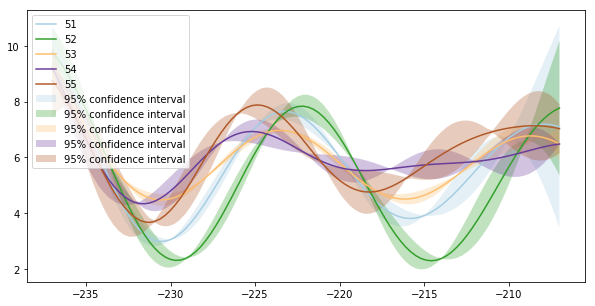

In [9]:
plt.figure(figsize=(10,5))
plt.plot(x11_p, y11_p, c=colors[0], label='51')
plt.fill(np.concatenate([x11_p, x11_p[::-1]]),
             np.concatenate([y11_p - 1.9600 * sigma11,
                            (y11_p + 1.9600 * sigma11)[::-1]]),
             alpha=.3, fc=colors[0], ec='None', label='95% confidence interval')
plt.plot(x12_p, y12_p, c=colors[5], label='52')
plt.fill(np.concatenate([x12_p, x12_p[::-1]]),
             np.concatenate([y12_p - 1.9600 * sigma12,
                            (y12_p + 1.9600 * sigma12)[::-1]]),
             alpha=.3, fc=colors[5], ec='None', label='95% confidence interval')
plt.plot(x13_p, y13_p, c=colors[10], label='53')
plt.fill(np.concatenate([x13_p, x13_p[::-1]]),
             np.concatenate([y13_p - 1.9600 * sigma13,
                            (y13_p + 1.9600 * sigma13)[::-1]]),
             alpha=.3, fc=colors[10], ec='None', label='95% confidence interval')
plt.plot(x14_p, y14_p, c=colors[15], label='54')
plt.fill(np.concatenate([x14_p, x14_p[::-1]]),
             np.concatenate([y14_p - 1.9600 * sigma14,
                            (y14_p + 1.9600 * sigma14)[::-1]]),
             alpha=.3, fc=colors[15], ec='None', label='95% confidence interval')
plt.plot(x15_p, y15_p, c=colors[19], label='55')
plt.fill(np.concatenate([x15_p, x15_p[::-1]]),
             np.concatenate([y15_p - 1.9600 * sigma15,
                            (y15_p + 1.9600 * sigma15)[::-1]]),
             alpha=.3, fc=colors[19], ec='None', label='95% confidence interval')
plt.legend()
plt.show()


7.004967027358871
[-207.]


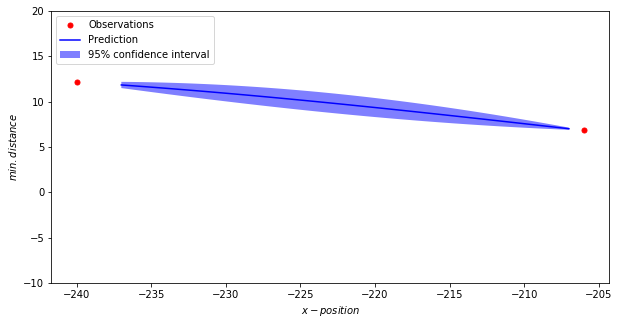

In [15]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
[x1, y1] = data_load('../../git/scenario_runner/data4.txt')
x1_p, y1_p, sigma1 = do_go(x1[::34], y1[::34], kernel)

In [17]:
print([np.argmin(sigma1)])

[99]
